In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import zipfile
!pip install gdown
import gdown

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!gdown --id 1UxZmHg62nAEdmYQONOvFtZIMnzE2Haw_

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1UxZmHg62nAEdmYQONOvFtZIMnzE2Haw_
From (redirected): https://drive.google.com/uc?id=1UxZmHg62nAEdmYQONOvFtZIMnzE2Haw_&confirm=t&uuid=b649d11f-1d23-4b5e-a1c6-7bc5398868bd
To: /kaggle/working/data.zip
100%|████████████████████████████████████████| 771M/771M [00:09<00:00, 81.0MB/s]


In [3]:
zip_path = '/kaggle/working/data.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working')

In [4]:
folder_path = '/kaggle/working/dataset'
dir = os.listdir(folder_path)
print(dir)

['cataract', 'glaucoma', 'diabetic_retinopathy', 'normal']


In [5]:
for i in range(len(dir)):
    file_types = set()

    current_folder_path = os.path.join(folder_path, dir[i])

    for file_name in os.listdir(current_folder_path):
        file_types.add(file_name.split('.')[-1])

    print(f"{dir[i]}: {file_types}")

cataract: {'jpg', 'png'}
glaucoma: {'jpg', 'png'}
diabetic_retinopathy: {'jpeg'}
normal: {'jpg'}


In [6]:
import cv2

for i in range(len(dir)):
    class_folder = os.path.join(folder_path, dir[i])
    files_path = os.listdir(class_folder)
    sizes = set()

    for file_path in files_path:
        image = cv2.imread(os.path.join(class_folder, file_path))

        if image is not None:
          height, width, channel = image.shape
          sizes.add((height, width, channel))
        else:
          print(f"Failed to read image: {file_path}")

    print('(Height, Width, Channels)')
    print(100*'-')
    print(f"{dir[i]}: {sizes}")


(Height, Width, Channels)
----------------------------------------------------------------------------------------------------
cataract: {(512, 512, 3), (1728, 2592, 3), (1632, 2464, 3), (1224, 1848, 3), (256, 256, 3)}
(Height, Width, Channels)
----------------------------------------------------------------------------------------------------
glaucoma: {(512, 512, 3), (1728, 2592, 3), (1632, 2464, 3), (1224, 1848, 3), (256, 256, 3)}
(Height, Width, Channels)
----------------------------------------------------------------------------------------------------
diabetic_retinopathy: {(512, 512, 3)}
(Height, Width, Channels)
----------------------------------------------------------------------------------------------------
normal: {(512, 512, 3)}


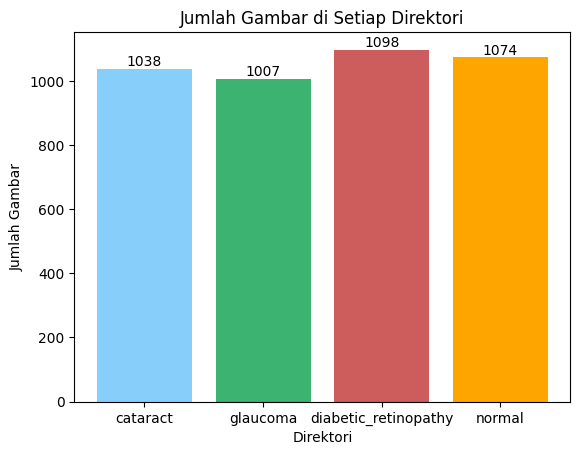

In [7]:
# Hitung jumlah gambar di setiap direktori
image_counts = []
for directory in dir:
    sub_dir = os.path.join(folder_path, directory)
    if os.path.isdir(sub_dir):
        file_count = len(os.listdir(sub_dir))
        image_counts.append(file_count)

# Menambahkan nilai jumlah di setiap bar
for i, count in enumerate(image_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Menetapkan beberapa warna
colors = ['lightskyblue', 'mediumseagreen', 'indianred', 'orange']

# Menampilkan hasil
plt.bar(dir, image_counts, color=colors)
plt.xlabel('Direktori')
plt.ylabel('Jumlah Gambar')
plt.title('Jumlah Gambar di Setiap Direktori')
plt.show()


In [8]:
from pathlib import Path
cataract = Path('/kaggle/working/dataset/cataract')
diabetic_retinopathy = Path('/kaggle/working/dataset/diabetic_retinopathy')
glaucoma = Path('/kaggle/working/dataset/glaucoma')
normal = Path('/kaggle/working/dataset/normal')

In [9]:
disease_type = [glaucoma, cataract, normal, diabetic_retinopathy]
df = pd.DataFrame()

for types in disease_type:
    for idx, imagepath in enumerate(types.iterdir()):
        df = pd.concat([df, pd.DataFrame({'image': [str(imagepath)], 'disease_type': [disease_type.index(types)]})], ignore_index=True)


In [10]:
df

,image,disease_type
0,/kaggle/working/dataset/glaucoma/_244_9609209.jpg,0
1,/kaggle/working/dataset/glaucoma/_283_8286295.jpg,0
2,/kaggle/working/dataset/glaucoma/Glaucoma_070.png,0
3,/kaggle/working/dataset/glaucoma/_239_5512637.jpg,0
4,/kaggle/working/dataset/glaucoma/_159_52965.jpg,0
...,...,...
4212,/kaggle/working/dataset/diabetic_retinopathy/1...,3
4213,/kaggle/working/dataset/diabetic_retinopathy/1...,3
4214,/kaggle/working/dataset/diabetic_retinopathy/1...,3
4215,/kaggle/working/dataset/diabetic_retinopathy/1...,3


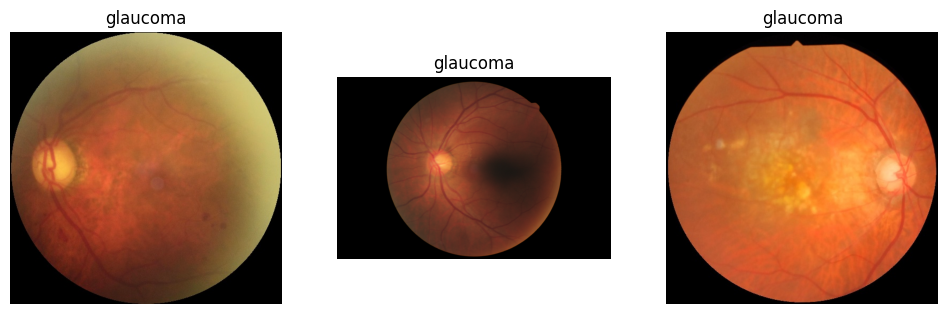

In [11]:
def plot_image(n, num_samples=3):
    disease_labels = ['glaucoma', 'cataract', 'normal', 'diabetic_retinopathy']
    images = df[df['disease_type'] == n].sample(num_samples)['image']

    plt.figure(figsize=(12, 12))

    for i, path in enumerate(images, 1):
        img = (plt.imread(path) - plt.imread(path).min()) / plt.imread(path).max()
        plt.subplot(3, 3, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(disease_labels[n])

    plt.show()
plot_image(0)

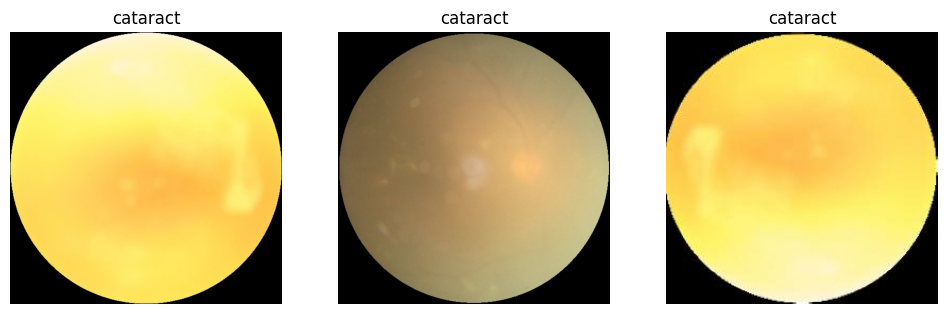

In [12]:
plot_image(1)

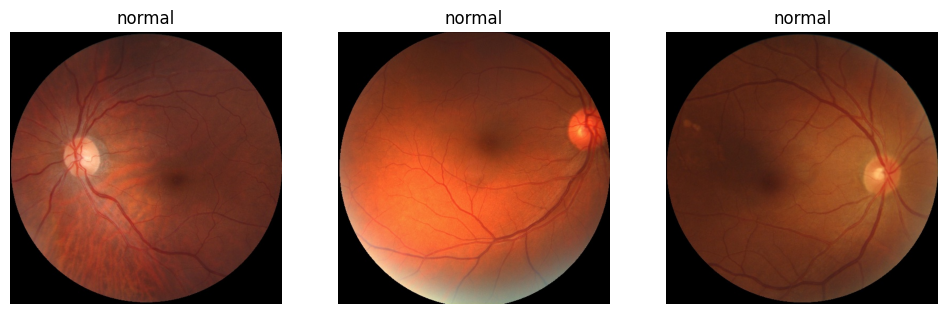

In [13]:
plot_image(2)

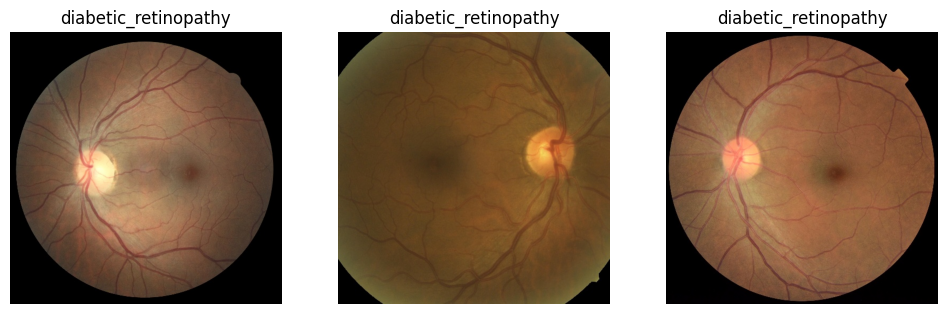

In [14]:
plot_image(3)

In [15]:
len(df['disease_type'].unique())

4

In [16]:
df['disease_type'] = pd.to_numeric(df['disease_type'])
df

,image,disease_type
0,/kaggle/working/dataset/glaucoma/_244_9609209.jpg,0
1,/kaggle/working/dataset/glaucoma/_283_8286295.jpg,0
2,/kaggle/working/dataset/glaucoma/Glaucoma_070.png,0
3,/kaggle/working/dataset/glaucoma/_239_5512637.jpg,0
4,/kaggle/working/dataset/glaucoma/_159_52965.jpg,0
...,...,...
4212,/kaggle/working/dataset/diabetic_retinopathy/1...,3
4213,/kaggle/working/dataset/diabetic_retinopathy/1...,3
4214,/kaggle/working/dataset/diabetic_retinopathy/1...,3
4215,/kaggle/working/dataset/diabetic_retinopathy/1...,3


In [17]:
df['disease_type'] = df['disease_type'].map({0:'glaucoma',1:'cataract',2:'normal',3:'diabetic_retinopathy'})
df

,image,disease_type
0,/kaggle/working/dataset/glaucoma/_244_9609209.jpg,glaucoma
1,/kaggle/working/dataset/glaucoma/_283_8286295.jpg,glaucoma
2,/kaggle/working/dataset/glaucoma/Glaucoma_070.png,glaucoma
3,/kaggle/working/dataset/glaucoma/_239_5512637.jpg,glaucoma
4,/kaggle/working/dataset/glaucoma/_159_52965.jpg,glaucoma
...,...,...
4212,/kaggle/working/dataset/diabetic_retinopathy/1...,diabetic_retinopathy
4213,/kaggle/working/dataset/diabetic_retinopathy/1...,diabetic_retinopathy
4214,/kaggle/working/dataset/diabetic_retinopathy/1...,diabetic_retinopathy
4215,/kaggle/working/dataset/diabetic_retinopathy/1...,diabetic_retinopathy


In [18]:
df = df.sample(frac=1).reset_index(drop=True)
df

,image,disease_type
0,/kaggle/working/dataset/normal/2974_left.jpg,normal
1,/kaggle/working/dataset/diabetic_retinopathy/1...,diabetic_retinopathy
2,/kaggle/working/dataset/glaucoma/_46_2760814.jpg,glaucoma
3,/kaggle/working/dataset/glaucoma/_358_8144492.jpg,glaucoma
4,/kaggle/working/dataset/diabetic_retinopathy/1...,diabetic_retinopathy
...,...,...
4212,/kaggle/working/dataset/glaucoma/_293_8683971.jpg,glaucoma
4213,/kaggle/working/dataset/glaucoma/746_left.jpg,glaucoma
4214,/kaggle/working/dataset/normal/3154_left.jpg,normal
4215,/kaggle/working/dataset/normal/2662_right.jpg,normal


In [19]:
from sklearn.model_selection import train_test_split
train_data, remain_data = train_test_split(df, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(remain_data, test_size=0.5, random_state=42)
print(len(train_data))
print(len(val_data))
print(len(test_data))

3373
422
422


In [20]:
import tensorflow as tf
# from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale=1./255,
                                      # rotation_range=10,
#                                       width_shift_range=0.5,
#                                       height_shift_range=0.5,
#                                       shear_range=0.5,
#                                       zoom_range=0.5,
                                      horizontal_flip=True
                                      )

train_generator = training_datagen.flow_from_dataframe(dataframe=train_data,
                                          x_col ='image',
                                          y_col = 'disease_type',
                                          target_size=(224,224),
                                          class_mode = 'categorical',
                                          batch_size = 45,
                                          seed=42,
                                          shuffle = True)

val_datagen = ImageDataGenerator(rescale = 1./255.)
val_generator = val_datagen.flow_from_dataframe(dataframe=val_data,
                                          x_col ='image',
                                          y_col = 'disease_type',
                                          target_size=(224,224),
                                          class_mode = 'categorical',
                                          batch_size = 12,
                                          seed=42,
                                          shuffle = True)
testing_datagen = ImageDataGenerator(rescale=1./255.)
testing_generator = testing_datagen.flow_from_dataframe(dataframe=test_data,
                                          x_col ='image',
                                          y_col = 'disease_type',
                                          target_size=(224,224),
                                          class_mode = 'categorical',
                                          batch_size = 12,
                                          shuffle = False)

Found 3373 validated image filenames belonging to 4 classes.
Found 422 validated image filenames belonging to 4 classes.
Found 422 validated image filenames belonging to 4 classes.


In [21]:
from keras.applications import VGG16,ResNet50,EfficientNetB3

# pre_trained_model = ResNet50(include_top=False, input_shape=(224, 224, 3))
pre_trained_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224,224,3), pooling= 'max')
pre_trained_model.trainable = False

for layer in pre_trained_model.layers[53:]:
    layer.trainable = True
    
pre_trained_model.summary()

43941136/43941136 [==============================] - 0s 0us/step
Model: "efficientnetb3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescal

In [22]:
from tensorflow.keras.callbacks import LearningRateScheduler
def exponential_decay(epoch, lr):
    decay_rate = 0.9
    decay_step = 5
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr

# Callback LearningRateScheduler
lr_scheduler = LearningRateScheduler(exponential_decay)

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, Adamax
from tensorflow.keras import regularizers
from kerastuner.tuners import RandomSearch

# def build_model(hp):
model = Sequential()
model.add(pre_trained_model)
# BatchNormalization layer
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, input_shape=(224,224,3)))  # Gantilah "your_input_shape" dengan bentuk input yang sesuai
# Dense layer
model.add(Dense(units=672 , activation='relu', kernel_regularizer=regularizers.l2(0.016), activity_regularizer=regularizers.l1(0.006), bias_regularizer=regularizers.l1(0.006)))
model.add(Dense(units=128 , activation='relu'))
# Dropout layer
model.add(Dropout(0.2, seed=2022))

# Output layer
model.add(Dense(4, activation='softmax'))

# Kompilasi model
model.compile(optimizer=Adamax(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    
#     return model
# Tampilkan arsitektur model

# model.summary()

/tmp/ipykernel_47/2037778044.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [25]:
# tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='my_dir', project_name='eyemedi')
# tuner.search_space_summary

In [26]:
# tuner.search(train_generator, epochs=20, validation_data=(val_generator))

In [27]:
from keras.callbacks import Callback, EarlyStopping

# checkpoint = ModelCheckpoint("model.h5", 
#                              monitor='val_accuracy', 
#                              verbose=1, 
#                              save_best_only=True, 
#                              save_weights_only=False, 
#                              mode='auto', 
#                              period=1)

early_stopping = EarlyStopping(monitor="val_accuracy",
                               patience=10,
                               verbose=1,
                               mode="max",
                               restore_best_weights=True
                              )
# early_stopping = EarlyStopping(monitor='val_accuracy',
#                               min_delta = 0.01,
#                               patience=5, 
#                               restore_best_weights=True)
class myCallback(tf.keras.callbacks.Callback):
       def on_epoch_end(self, epoch, logs={}):
           if (logs.get('accuracy') > 0.89 and logs.get('val_accuracy') > 0.89):
               print("\nTarget has been reached, training cancelled.")
               self.model.stop_training = True

callback = myCallback()
# early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [28]:
# batch_size = 32
# n_spe = train_generator.samples // batch_size
# n_val_steps = val_generator.samples // batch_size

In [29]:
history = model.fit(train_generator,
                    epochs=60,
                    validation_data=val_generator,
                    verbose=1,
                    callbacks=[lr_scheduler, callback])

Epoch 1/60


2023-12-12 04:18:28.562793: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


75/75 [==============================] - 52s 437ms/step - loss: 14.0986 - accuracy: 0.6466 - val_loss: 13.9638 - val_accuracy: 0.2393 - lr: 0.0010
Epoch 2/60
75/75 [==============================] - 29s 382ms/step - loss: 8.7673 - accuracy: 0.7501 - val_loss: 8.3524 - val_accuracy: 0.2820 - lr: 0.0010
Epoch 3/60
75/75 [==============================] - 29s 379ms/step - loss: 5.7054 - accuracy: 0.7596 - val_loss: 5.4880 - val_accuracy: 0.4526 - lr: 0.0010
Epoch 4/60
75/75 [==============================] - 28s 376ms/step - loss: 3.8081 - accuracy: 0.7679 - val_loss: 3.7982 - val_accuracy: 0.4028 - lr: 0.0010
Epoch 5/60
75/75 [==============================] - 28s 375ms/step - loss: 2.6579 - accuracy: 0.7818 - val_loss: 2.7827 - val_accuracy: 0.5521 - lr: 0.0010
Epoch 6/60
75/75 [==============================] - 28s 377ms/step - loss: 1.9918 - accuracy: 0.7942 - val_loss: 2.0301 - val_accuracy: 0.6801 - lr: 9.0000e-04
Epoch 7/60
75/75 [==============================] - 29s 388ms/step - 

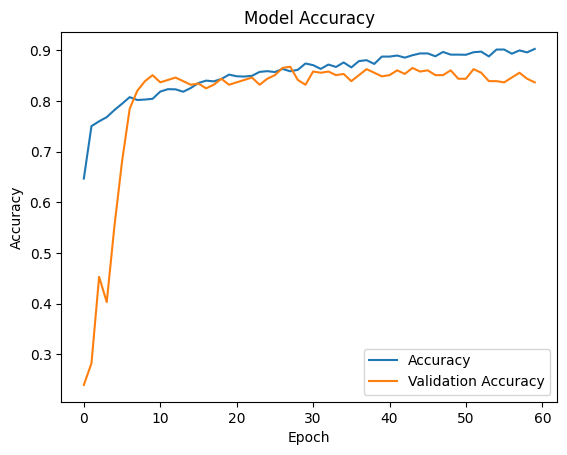

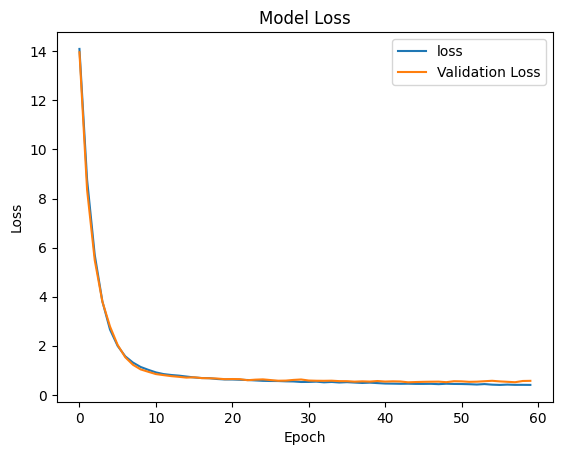

In [30]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [31]:
from keras.models import load_model

model.evaluate(testing_generator)

36/36 [==============================] - 4s 97ms/step - loss: 0.4965 - accuracy: 0.8602


[0.49645182490348816, 0.8601895570755005]

In [32]:
predictions = model.predict_generator(testing_generator)

/tmp/ipykernel_47/435935186.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(testing_generator)


In [33]:
predicted_classes = np.argmax(predictions, axis=1)

# Menampilkan hasil kelas prediksi
print(predicted_classes)

[2 3 0 2 2 0 1 1 3 2 1 1 1 0 0 1 3 3 1 1 3 1 1 2 2 3 2 1 0 0 3 1 1 3 0 0 0
 1 0 0 1 1 3 0 0 1 2 0 1 2 0 1 1 3 2 3 3 3 0 1 0 2 2 0 0 3 2 2 3 1 2 1 2 1
 1 0 2 0 1 2 3 0 1 0 3 0 1 1 1 1 3 0 0 2 3 2 0 0 1 2 1 0 0 2 2 1 1 0 0 0 1
 3 3 1 3 0 0 0 1 0 1 2 2 3 2 1 2 1 0 0 1 1 0 0 0 3 1 0 2 2 0 2 1 3 0 0 0 0
 0 1 2 3 1 1 3 0 0 0 1 2 1 2 0 0 3 0 0 3 0 0 0 0 3 0 0 3 3 3 2 1 2 0 3 0 0
 2 2 1 1 2 1 3 1 0 2 1 1 2 1 1 3 2 0 2 2 2 2 2 2 1 0 1 3 3 2 3 2 2 1 3 3 3
 1 0 3 2 3 1 0 1 3 3 3 1 3 3 0 0 1 3 2 2 1 0 3 2 1 1 0 0 2 3 2 2 2 3 3 0 1
 0 2 1 2 1 3 2 3 2 3 0 0 1 0 3 1 1 3 1 0 0 0 2 3 3 1 0 3 3 2 1 1 1 2 0 0 2
 2 1 3 3 0 0 0 0 0 1 1 2 1 3 3 0 2 2 2 3 3 0 3 3 1 0 2 3 0 2 2 1 1 1 3 3 0
 1 1 1 3 2 2 3 2 3 1 1 3 2 2 0 1 3 2 1 2 3 3 3 1 0 1 3 2 1 2 1 2 2 1 2 0 1
 0 1 1 2 1 0 0 1 0 2 3 1 3 0 2 2 2 1 0 1 3 2 2 1 2 1 0 0 3 1 0 2 2 1 1 3 3
 2 0 2 1 0 1 1 0 2 0 0 3 3 1 2]


In [34]:
model.save('modelV1.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
model.save('modelV1.pkl')

In [36]:
from IPython.display import FileLink
FileLink(r'modelV1.h5')

/kaggle/working/modelV1.h5